In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import svm,datasets
import pandas as pd

#import some data
employee = pd.read_csv('SVM_pallavi.csv')
print(employee)
employee = employee.dropna()
print(employee)

    Sno  Year of Experience  Salary  Category
0     1                 1.2     3.2         0
1     2                 2.5     3.8         0
2     3                 3.8     4.2         0
3     4                 5.1     4.8         0
4     5                 6.3     5.2         0
5     6                 8.0     5.8         0
6     7                 9.2     6.2         0
7     8                10.5     6.8         0
8     9                12.1     7.2         0
9    10                14.0     7.8         0
10   11                15.3     8.2         0
11   12                16.7     8.8         0
12   13                18.2     9.2         0
13   14                19.6     9.8         0
14   15                20.9    10.2         1
15   16                22.4    10.8         1
16   17                28.4    11.2         1
17   18                25.2    11.8         1
18   19                26.7    12.2         1
    Sno  Year of Experience  Salary  Category
0     1                 1.2     3.

[[ 1.2  3.2]
 [ 2.5  3.8]
 [ 3.8  4.2]
 [ 5.1  4.8]
 [ 6.3  5.2]
 [ 8.   5.8]
 [ 9.2  6.2]
 [10.5  6.8]
 [12.1  7.2]
 [14.   7.8]
 [15.3  8.2]
 [16.7  8.8]
 [18.2  9.2]
 [19.6  9.8]
 [20.9 10.2]
 [22.4 10.8]
 [28.4 11.2]
 [25.2 11.8]
 [26.7 12.2]] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1]
[[ 0.2  1.2  2.2  3.2  4.2  5.2  6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2
  14.2 15.2 16.2 17.2 18.2 19.2 20.2 21.2 22.2 23.2 24.2 25.2 26.2 27.2
  28.2 29.2]
 [ 0.2  1.2  2.2  3.2  4.2  5.2  6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2
  14.2 15.2 16.2 17.2 18.2 19.2 20.2 21.2 22.2 23.2 24.2 25.2 26.2 27.2
  28.2 29.2]
 [ 0.2  1.2  2.2  3.2  4.2  5.2  6.2  7.2  8.2  9.2 10.2 11.2 12.2 13.2
  14.2 15.2 16.2 17.2 18.2 19.2 20.2 21.2 22.2 23.2 24.2 25.2 26.2 27.2
  28.2 29.2]] [[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 

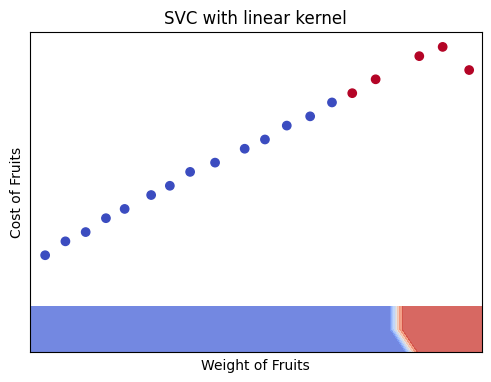

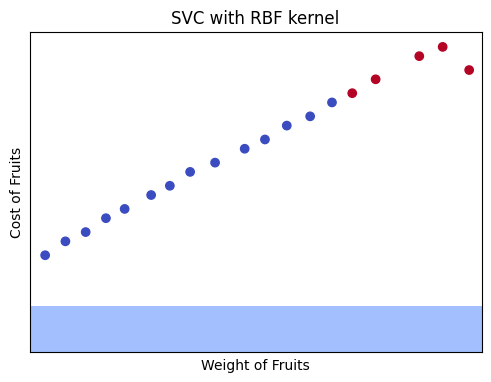

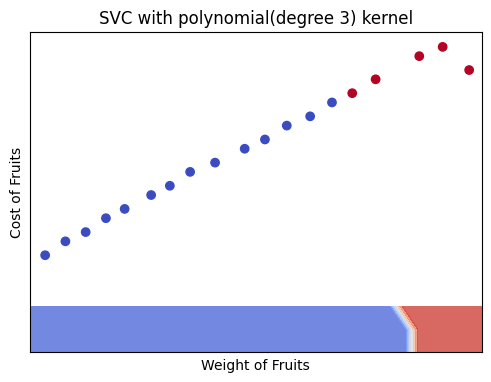

In [25]:
X = employee[['Year of Experience', 'Salary']].to_numpy()
y = employee['Category'].to_numpy()
print(X,y)
h = 1 # step size in the mesh

'''we create an instance of SVM and fit out data. we do not scale our 
data since we want to plot the support vectors'''
C = 0.1 # 1.0 # SVM regularization parameter
svc = svm.SVC(kernel = 'linear', C = C).fit(X,y)
rbf_svc = svm.SVC(kernel = 'rbf', gamma = 1, C=1).fit(X,y)
poly_svc = svm.SVC(kernel = 'poly', degree=2, C=1).fit(X,y)
#lin_svc = svm.linearSVC(C=C).fit(X,y)

#create a mesh to plot in 
# x_min,x_max = X.iloc[:,0].min() - 1, X.iloc[:, 0].max() + 1
# y_min,y_max = X.iloc[:, 1].min() - 1, X.iloc[: , 1].max() +1
x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
y_min, y_max = y.min() - 1, y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max , h),
                    np.arange(y_min, y_max, h))
print(xx,yy)

# title for the plots
titles = ['SVC with linear kernel',
         'SVC with RBF kernel',
         'SVC with polynomial(degree 3) kernel']

for i, clf in enumerate((svc, rbf_svc, poly_svc)):
   plt.figure(figsize = (14, 10))
   plt.subplot(2, 2, i+1)
   plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

   Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

   Z = Z.reshape(xx.shape)
   plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)
   #plot also the traning points
   plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.coolwarm)
   plt.xlabel('Weight of Fruits')
   plt.ylabel('Cost of Fruits')
   plt.xlim(xx.min(), xx.max())
   plt.xticks(())
   plt.yticks(())
   plt.title(titles[i])
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
param_grid = {'C' : [0.1, 1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(),param_grid, refit = True, verbose = 2)
grid.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [15]:
print(grid.best_estimator_)

SVC(C=0.1, gamma=1)
